# Portfolio Project: Online Retail Exploratory Data Analysis with Python

EDA Performed by: [Sougat Dey](#https://www.linkedin.com/in/sougatdey/)

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset
The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

# Table of Contents
- [Import libraries](#libraries)
- [Load dataset](#load-dataset)
- [Descriptive Statistics](#describe)

### [Data Cleaning & Preparation](#cleaning)
- [Handling Null Values](#null-values)
- [Handlining Duplicates Entries](#duplicate-rows)

### [Begining of Univariate & Multivariate Analysis](#analysis)
- [Analyzing InvoiceNo](#invoiceno)
    - [Number of Orders based on InvoiceNo](#norders-invoice)
- [Analyzing Products: StockCode & Description](#stock-des)
    - [Conflict in Description column](#conflict)
    - [Product Lookup Table](#product-lookup)
    - [New column: InvoicedPrice](#invoiced-price)
- [Analyzing Quantity](#quantity)
    - [New column: Total_Ordered_Quantity & N_Orders](#product-lookup)
    - [New column: Average_Order_Quantity](#avg-order-quantity)
- [Further Analysis: product_lookup](#further-product-lookup)
    - [Top 10 Product by Most Revenue](#product-by-most-revenue)
    - [Country Wise Highest Selling Products](#country-wise-product)
- [Analyzing InvoiceDate](#invoice-date)
    - [Earliest & Latest Entries](#time-period)
    - [Elapsed Time](#elapsed-time)
    - [Covered Months, Years & Days](#covered)
    - [Orders by Months](#orders-month)
        - [Busiest Month](#busiest-month)
    - [Check for SALE](#check-sale)
    - [Orders by Days](#orders_day)
    - [Rush Hour](#rush-hour)
- [Analyzing Country](#country-analysis)
    - [Top 5 Countries](#top-five)
- [Analyzing CustomerID](#top-five-cust)
	- [Most Valuable Customers](#top-five-cast)
	- [Average Spent](#avg-spent)

### [Cohort Analysis on Customer Retention](#cohort)
- [Retention Matrix](#retention)
- [Cohort Analysis Heatmap](#heatmap)

### [Summary & Rocommendations](#summary)

## 1. Import Required Libraries <a name="libraries"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from operator import attrgetter
import locale

In [2]:
#style sheet
plt.style.use('ggplot')

## 2. Load Dataset: `Online Retail`<a name="load-dataset"></a>

In [3]:
original_df = pd.read_excel("Online Retail.xlsx")

In [4]:
#making a copy of the original dataset
master_df = original_df.copy()

**Note**: We imported the dataset and made a copy of the same to ensure if anything goes wrong, we have the main dataset to look for errors.

## 3. Descriptive Statistics <a name="describe"></a>

In [5]:
master_df.shape

(541909, 8)

In [6]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
master_df.describe(include=('float64','int64'))

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


- Applying `.describe()` clearly shows that there're `NEGATIVE` values in both **Quantity** and **UnitPrice** columns. 
- Both **Quantity** and **UnitPrice** columns have to be inspected further for addressing this issue.

## 4. Data Cleaning and Preparation <a name="cleaning"></a>

In [8]:
master_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


#### Following steps are - 
- [NULL Values](#null-values)
- [Duplicate Entries](#duplicate-rows)
- [DataType Change of CustomerID](#dtype-customerid)

### 4.1. Handling Null values <a name="null-values"></a>

In [9]:
#checking total NULL values in each colulmn
master_df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [10]:
#displaying rows with NULL values in any of the columns
master_df[master_df.isnull().any(axis=1)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [11]:
master_df[master_df.isnull().any(axis=1)].shape[0]*100/master_df.shape[0]

24.926694334288598

- There're 135037 rows (≈ 25%) that contain one/more `NULL` values. 
- Fetched DataFrame has `NULL` value in the entire **CustomerID** column. 
- As we're expected to perform an **EDA** on the given dataset, **CustomerID** is one of the most essential columns. So, the  rows containing `NULL` values in the **CustomerID** column don't contribute to our analysis. 

#### Hence, it's best to drop these rows.

In [12]:
## Fetching indices of rows that has one/more NULL values
master_df[master_df.isnull().any(axis=1)].index

Int64Index([   622,   1443,   1444,   1445,   1446,   1447,   1448,   1449,
              1450,   1451,
            ...
            541531, 541532, 541533, 541534, 541535, 541536, 541537, 541538,
            541539, 541540],
           dtype='int64', length=135080)

In [13]:
## dropping rows by indices fetched earlier
master_df = master_df.drop(master_df[master_df.isnull().any(axis=1)].index).reset_index(drop=True)
master_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [14]:
#checking total NULL values in each colulmn to make sure there are no NULL values left
master_df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

**Note**: It confirms there's no remaining row containing any `NULL` value.

### 4.2. Handling Duplicate Entries <a name="duplicate-rows"></a>

In [15]:
#fetching the duplicated rows
master_df[master_df.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
406595,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
406609,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
406612,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
406619,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


In [16]:
print(f"Percentage of Duplicated rows: {np.round(master_df[master_df.duplicated()].shape[0]*100/master_df.shape[0],2)}%")

Percentage of Duplicated rows: 1.28%


In [17]:
#dropping duplicate rows and resetting the index
master_df.drop_duplicates(inplace=True)

master_df.reset_index(drop=True,inplace=True)

## 5. Begining of Univariate and Multivariate Analysis <a name="analysis"></a>

As this is a dataset containing transaction of an Online Retail Store, we'll have to perform both **Univariate** and **Multivariate** in different occasions.

## 5.1 Analyzing `InvoiceNo` <a name="invoiceno"></a>

As previously discovered by using `.describe()`, both `Quantity` and `UnitPrice` had **NEGATIVE** minimum values. Let's first see rows with **NEGATIVE** values in either or both `Quantity` and `UnitPrice` columns.

In [18]:
#fetching rows with negative values in either of Quantity or UnitPrice column and displaying the first 10 rows 
master_df[(master_df['Quantity'] < 0) | (master_df['UnitPrice'] < 0)].head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,2010-12-01 10:24:00,3.45,17548.0,United Kingdom
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
915,C536506,22960,JAM MAKING SET WITH JARS,-6,2010-12-01 12:38:00,4.25,17897.0,United Kingdom


In [19]:
#fetching rows with negative values in either of Quantity or UnitPrice column and displaying the last 10 rows 
master_df[(master_df['Quantity'] < 0) | (master_df['UnitPrice'] < 0)].tail(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
400852,C581468,21314,SMALL GLASS HEART TRINKET POT,-10,2011-12-08 19:26:00,2.10,13599.0,United Kingdom
400853,C581468,22098,BOUDOIR SQUARE TISSUE BOX,-12,2011-12-08 19:26:00,0.39,13599.0,United Kingdom
400887,C581470,23084,RABBIT NIGHT LIGHT,-4,2011-12-08 19:28:00,2.08,17924.0,United Kingdom
401132,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom
401158,C581490,22178,VICTORIAN GLASS HANGING T-LIGHT,-12,2011-12-09 09:57:00,1.95,14397.0,United Kingdom
401159,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
401243,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
401410,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
401411,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom
401412,C581569,20979,36 PENCILS TUBE RED RETROSPOT,-5,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


 - **NEGATIVE** values in either of `Quantity` and `UnitPrice` columns don't mean anything. 
 - Hence, these can be interpreted as **ERRORNEOUS** entries.
 
 **Note**: As entries with `InvoiceNo` that start with a "C" have **NEGATIVE** values in the `Quantity` column, we might conclude that these are cancelled orders. But since we're not given proper instruction for indentifying an order to be a cancelled one, we cannot do further analysis with these entries.
 
 - Thus, it's wise to **DROP** these entries for further analysis.
 
 

In [20]:
#dropping rows with negative values in either of Quantity or UnitPrice column & resetting the index
master_df.drop(master_df[(master_df['Quantity'] < 0) | (master_df['UnitPrice'] < 0)].index, inplace= True)

master_df.reset_index(drop = True, inplace = True)

In [21]:
#checking the number of remaining entries in the dataset
master_df.shape[0]

392732

### 5.1.1. Number of Orders based on `InvoiceNo` <a name="norders-invoice"></a>

In [22]:
#checking the number of remaining entries in the dataset
master_df.shape[0]

392732

In [23]:
#checking the number of unique orders in the dataset
print(f"Total Orders b/w Dec'10 & Dec'11: {master_df['InvoiceNo'].nunique()}")

Total Orders b/w Dec'10 & Dec'11: 18536


- Although there are almost 4M entries in the dataset, there had been only 18536 orders in the span of Dec'10 - Dec'11.
- Each **InvoiceNo** represents a transaction during which a customer might have bought one or multiple products from the business.
- There are multiple entries with same **InvoiceNo** which indicates there had been situations where a customer ordered multiple items in a single order that generated a single **InvoiceNo**.

## 5.2. Analyzing Products: `StockCode` & `Description` <a name='stock-des'></a>

In [24]:
print(f"Unique StockCodes: {master_df['StockCode'].nunique()}\nUnique Descriptions: {master_df['Description'].nunique()}")

Unique StockCodes: 3665
Unique Descriptions: 3877


 - It means there are over **200** `StockCode` with more than one `Desciption`.
 - Because of this issue, **ANSWERING** key questions like **Most Selling Product**, **Highest Revenue Generating Product**, **Most Customer Attracting Product** etc. would not be possible.
 
 #### Solution:
We'll create a Product lookup table that'll have **StockCodes** with most used **Description** based on the entire dataset. From that we'll replace the existing `Description` column of the `master_df` DataFrame with the new conflict-free `Description`.

### 5.2.1. Eliminating Conficts in `Description` <a name='conflict'></a>

As `Description` should be unique to each `StockCode`, we can list out the most used `Description` for each `StockCode` and update those accordinly for the main dataset. 

In [25]:
#creating a temporary product series with StockCode, Description and Number of times that Description was used
product_temp = master_df.groupby("StockCode")['Description'].value_counts()

product_temp.head()

StockCode  Description                 
10002      INFLATABLE POLITICAL GLOBE       49
10080      GROOVY CACTUS INFLATABLE         21
10120      DOGGY RUBBER                     29
10125      MINI FUNKY DESIGN TAPES          63
10133      COLOURING PENCILS BROWN TUBE    122
Name: Description, dtype: int64

In [26]:
#creating a product lookup by coverting the temporary product table to a dataframe and sorting the table by Count
product_lookup = product_temp.to_frame().rename({'Description':'Count'}, axis = 1).reset_index().sort_values('Count', ascending=False).reset_index(drop=True)

product_lookup.head()

,StockCode,Description,Count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2016
1,22423,REGENCY CAKESTAND 3 TIER,1714
2,85099B,JUMBO BAG RED RETROSPOT,1615
3,84879,ASSORTED COLOUR BIRD ORNAMENT,1395
4,47566,PARTY BUNTING,1390


**Note**: We sorted the DataFrame by `Count` column that way only rows containing most used `Description` will stay at the top. Now, we'll drop rows containing duplicate values in `StockCode`. Hence, we'll only be left with `StockCode` and its most used `Description`

In [27]:
#keeping the most used description for each product and restting the index
product_lookup = product_lookup.drop_duplicates(subset=['StockCode'])

product_lookup = product_lookup.reset_index(drop=True)

product_lookup.head()

,StockCode,Description,Count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2016
1,22423,REGENCY CAKESTAND 3 TIER,1714
2,85099B,JUMBO BAG RED RETROSPOT,1615
3,84879,ASSORTED COLOUR BIRD ORNAMENT,1395
4,47566,PARTY BUNTING,1390


- As `Count` has already served its purpose to filter out most-used `Description`. It's better to drop that particular column for further analysis.

In [28]:
product_lookup.drop(columns = 'Count', inplace = True)

### 5.2.2. Product Lookup <a name='product-look-up'></a>

In [29]:
product_lookup.head()

,StockCode,Description
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER
1,22423,REGENCY CAKESTAND 3 TIER
2,85099B,JUMBO BAG RED RETROSPOT
3,84879,ASSORTED COLOUR BIRD ORNAMENT
4,47566,PARTY BUNTING


- Same with `product_temp` DataFrame. It has nothing further to contribute to our analysis. Hence, we'll drop it too. 

In [30]:
del product_temp

#### Now, we'll merge both `product_lookup` and `master_df` to eliminate the confict in `Description`

In [31]:
master_df = master_df.merge(product_lookup, on='StockCode').drop(columns = 'Description_x').rename({'Description_y': "Description"}, axis=1)

- Rearranging the DataFrame according to the original orders.

In [32]:
master_df = master_df[['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']]

In [33]:
master_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536373,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 09:02:00,2.55,17850.0,United Kingdom
2,536375,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 09:32:00,2.55,17850.0,United Kingdom
3,536390,85123A,WHITE HANGING HEART T-LIGHT HOLDER,64,2010-12-01 10:19:00,2.55,17511.0,United Kingdom
4,536394,85123A,WHITE HANGING HEART T-LIGHT HOLDER,32,2010-12-01 10:39:00,2.55,13408.0,United Kingdom


### 5.2.3. New column: `InvoicedPrice` <a name='invoiced-price'></a>

We'll introduce a new column to calculate the billed amount for a particular item during each transaction involving both `UnitPrice` and `Quantity` columns. 

In [34]:
master_df['InvoicedPrice'] = master_df['Quantity'] * master_df['UnitPrice']

In [35]:
master_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoicedPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.3
1,536373,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 09:02:00,2.55,17850.0,United Kingdom,15.3
2,536375,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 09:32:00,2.55,17850.0,United Kingdom,15.3
3,536390,85123A,WHITE HANGING HEART T-LIGHT HOLDER,64,2010-12-01 10:19:00,2.55,17511.0,United Kingdom,163.2
4,536394,85123A,WHITE HANGING HEART T-LIGHT HOLDER,32,2010-12-01 10:39:00,2.55,13408.0,United Kingdom,81.6


## 5.3. Analyzing`Quantity`(with `StockCode` & `InvoiceNo`) <a name='quantity'></a>

In [36]:
#checking the basic statistics for the Quantity column
master_df['Quantity'].describe()

count    392732.000000
mean         13.153718
std         181.588420
min           1.000000
25%           2.000000
50%           6.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64

In [37]:
#checking the skewness of the Quantity column's distribution
master_df['Quantity'].skew()

400.81171444890526

#### Initial Interpretation - 
- `Quantity` column is heavily right-skewed.
- 75% of the values in the `Quantity` column is below 12. That means the percentage of bulk orders is lot less compared to regular orders.
- The maximum value of the `Quantity` column is way too large compared to other values. 
- That leads to checking the dataset for erroneous entries in the `Quantity` column.

**Note**: The `Quantity` column cannot be analyzed independently. Why so? It's explained in the further analysis.

In [38]:
#checking the number of entries in the dataset
master_df.shape[0]

392732

In [39]:
#Checking the number of unique orders
master_df['InvoiceNo'].nunique()

18536

- There are only **18536** unique `InvoiceNo` available in the entire dataset.
- On the contrary, there are almost **4M** entries/rows in the dataset.

In [40]:
#sorted the dataset bu InvoiceNo
master_df.sort_values('InvoiceNo').head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoicedPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
2280,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
2523,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2846,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
3169,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,15.30
3468,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,25.50
2023,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4042,536366,22632,HAND WARMER RED RETROSPOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10
3587,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10
6121,536367,22748,POPPY'S PLAYHOUSE KITCHEN,6,2010-12-01 08:34:00,2.10,13047.0,United Kingdom,12.60


#### As we arranged the DataFrame by `InvoiceNo`, we can see:
- First 7 rows have entries for `InvoiceNo (536365)`.
- Customer `CustomerID (17850)` purchased 7 different items in different quantities from the business.



**Note**: That means each `InvoiceNo` indicates an **INDEPENDENT** transaction where the customer might have purchased one or more products from the business in similar or different quantities, and that led to have multiple entries of different product for those transaction as we're seeing those as entries in the DataFrame.

Hence, The `Quantity` column cannot be analyzed independently as explained above since `Quantity` independently **DOES NOT** contribute to our analysis. That's why we'll have to take other columns like `InvoiceNo` and `StockCode` into account to analyze the `Quantity` column correctly.

In [41]:
master_df.groupby('StockCode').agg({'Quantity':'sum', 'InvoiceNo':'nunique'}).reset_index().rename({'Quantity':'Total_Ordered_Quantity', 'InvoiceNo':'N_Orders'}, axis=1)

,StockCode,Total_Ordered_Quantity,N_Orders
0,10002,823,49
1,10080,291,21
2,10120,192,29
3,10125,1225,61
4,10133,2373,122
...,...,...,...
3660,C2,134,133
3661,DOT,16,16
3662,M,6939,258
3663,PADS,4,4


#### Required Action:
Now, we'll merge the above DataFrame with the [Product Look-up](#product-look-up) DataFrame we created earlier in our EDA process so that we can combine more metric like `UnitPrice` and `InvoicedAmount` for better understanding of the offered **PRODUCTS** on the platform.

### 5.3.1 New column: `Total_Ordered_Quantity` & `N_Orders` in [Product Lookup](#product-lookup) <a name='new-prodct-lookup'></a>

In [42]:
product_lookup = product_lookup.merge(master_df.groupby('StockCode').agg({'Quantity':'sum', 'InvoiceNo':'nunique'}).reset_index().rename({'Quantity':'Total_Ordered_Quantity', 'InvoiceNo':'N_Orders'}, axis=1), on='StockCode')

In [43]:
product_lookup.head()

,StockCode,Description,Total_Ordered_Quantity,N_Orders
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,36763,1978
1,22423,REGENCY CAKESTAND 3 TIER,12384,1704
2,85099B,JUMBO BAG RED RETROSPOT,46078,1600
3,84879,ASSORTED COLOUR BIRD ORNAMENT,35263,1375
4,47566,PARTY BUNTING,15283,1380


### 5.3.2. New column: `Average_Order_Quantity` <a name='avg-order-quantity'></a>

- As columns `Total_Ordered_Quantity` & `N_Orders` represent the `Quantity` ordered for a particular project as a whole in the business. But understand the per order `Quantity` of a particular product. We can another column called `Average_Order_Quantity`.

In [44]:
product_lookup['Average_Order_Quantity'] = np.floor_divide(product_lookup['Total_Ordered_Quantity'],product_lookup['N_Orders'])

product_lookup.head()

,StockCode,Description,Total_Ordered_Quantity,N_Orders,Average_Order_Quantity
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,36763,1978,18
1,22423,REGENCY CAKESTAND 3 TIER,12384,1704,7
2,85099B,JUMBO BAG RED RETROSPOT,46078,1600,28
3,84879,ASSORTED COLOUR BIRD ORNAMENT,35263,1375,25
4,47566,PARTY BUNTING,15283,1380,11


In [45]:
#checking the basic statistics for the new column
product_lookup['Average_Order_Quantity'].describe()

count     3665.000000
mean        33.330969
std       1338.016002
min          1.000000
25%          3.000000
50%          7.000000
75%         13.000000
max      80995.000000
Name: Average_Order_Quantity, dtype: float64

In [46]:
product_lookup['Average_Order_Quantity'].skew()

60.49756138073071

- `Average_Order_Quantity` column is highly skewed.
- 75% of the values are below 1414.
- Whereas the maximum value is 80995.
- As the distribution is heavily right-skewed, the mean wouldn't be an appropriate metric to rely on for the average quantity ordered for the business.
- It is almost safe to conclude that the average quantity a customer orders for on the platform orders is 7 units. 

**Note**: There are lots of outliers in the `Quantity` column. As the 'Average_Order_Quantity' column in the **product_look** too has many outliers, it might pose many operational challenges, such as inventory management, fulfillment logistics, and stock availability. 

## 5.4. Further Analysis: `product_lookup` <a name='further-product-lookup'></a>

- Introducing another column to calculate the **TOTAL REVENUE GENERATED** (corrected upto 2 decimal places) by each product on the platform using `master_df` DataFrame and merging it to `product_lookup` for further analysis.

In [47]:
product_lookup = product_lookup.merge(master_df.groupby("StockCode").agg({'InvoicedPrice':'sum'}).reset_index().rename({'InvoicedPrice':'Total_Revenue'}, axis=1), on='StockCode')

In [48]:
product_lookup['Total_Revenue'] = np.round(product_lookup['Total_Revenue'],2)

In [49]:
product_lookup.head()

,StockCode,Description,Total_Ordered_Quantity,N_Orders,Average_Order_Quantity,Total_Revenue
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,36763,1978,18,100547.45
1,22423,REGENCY CAKESTAND 3 TIER,12384,1704,7,142264.75
2,85099B,JUMBO BAG RED RETROSPOT,46078,1600,28,85040.54
3,84879,ASSORTED COLOUR BIRD ORNAMENT,35263,1375,25,56413.03
4,47566,PARTY BUNTING,15283,1380,11,68785.23


### 5.4.1. Top 10 Products by Most Revenue <a name='product-by-most-revenue'></a>

- Here are top 10 products that generated the most revenue for the business between December 2010 and December 2011.

In [50]:
#sorting the table to check top 10 product that generated the highest revenue
product_lookup.sort_values('Total_Revenue', ascending= False).head(10)

,StockCode,Description,Total_Ordered_Quantity,N_Orders,Average_Order_Quantity,Total_Revenue
3557,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,1,80995,168469.60
1,22423,REGENCY CAKESTAND 3 TIER,12384,1704,7,142264.75
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,36763,1978,18,100547.45
2,85099B,JUMBO BAG RED RETROSPOT,46078,1600,28,85040.54
579,23166,MEDIUM CERAMIC TOP STORAGE JAR,77916,195,399,81416.73
7,POST,POSTAGE,3120,1099,2,77803.96
4,47566,PARTY BUNTING,15283,1380,11,68785.23
3,84879,ASSORTED COLOUR BIRD ORNAMENT,35263,1375,25,56413.03
349,M,Manual,6939,258,26,53419.93
30,23084,RABBIT NIGHT LIGHT,27153,801,33,51251.24


## Q1. What is the most selling product in the business? <a name="q1"></a>

In [51]:
#sorting the table to check the most ordered product
product_lookup.sort_values(by = 'Total_Ordered_Quantity', ascending=False).head(1)[['StockCode','Description']]

,StockCode,Description
3557,23843,"PAPER CRAFT , LITTLE BIRDIE"


### 5.4.2. Country Wise Highest Selling Products <a name="country-wise-product"></a>

In [52]:
master_df.groupby(["StockCode","Country"]).agg({'Quantity':'sum'}).reset_index().sort_values("Quantity", ascending = False).drop_duplicates(subset=['Country']).head().merge(product_lookup[['StockCode','Description']], how= 'left', on='StockCode')

,StockCode,Country,Quantity,Description
0,23843,United Kingdom,80995,"PAPER CRAFT , LITTLE BIRDIE"
1,23084,Netherlands,4801,RABBIT NIGHT LIGHT
2,23084,France,4000,RABBIT NIGHT LIGHT
3,23084,Japan,3408,RABBIT NIGHT LIGHT
4,22492,Australia,2952,MINI PAINT SET VINTAGE


## Q2. Which product did generate the most revenue for the business? <a name="q2"></a>

In [53]:
product_lookup.sort_values(by = 'Total_Revenue', ascending=False).head(1)[['StockCode','Description']]

,StockCode,Description
3557,23843,"PAPER CRAFT , LITTLE BIRDIE"


## Q3. What is the total revenue generated during Dec'10 - Dec'11?

In [54]:
product_lookup['Total_Revenue'].sum()

8887208.89

In [55]:
# Set the locale to the United Kingdom
locale.setlocale(locale.LC_ALL, 'en_GB.UTF-8')

# Your number to format
total_revenue_all = product_lookup['Total_Revenue'].sum()

# Format the number as pound sterling
total_revenue_all = locale.currency(total_revenue_all, grouping=True)

print(f"Total Revenue Generated b/w Dec'10 & Dec'11: {total_revenue_all}")

Total Revenue Generated b/w Dec'10 & Dec'11: £8,887,208.89


## 5.5. Analyzing `InvoiceDate` <a name="invoice-date"></a>

Since the `InvoiceDate` column has extremely detailed entries. It'll help us conclude the following -
- [Earliest & Latest Entries](#time-period)
- [Elapsed Time](#elapsed-time)
- [Covered Months, Years & Days](#covered)
- [Orders by Months](#orders-month)
    - [Busiest Month](#busiest-month)
- [Check for SALE](#check-sale)
- [Orders by Days](#orders_day)
- [Rush Hour](#rush-hour)

### 5.5.1. Earliest & Latest Entries <a name="time-period"></a>

In [56]:
master_df['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [57]:
master_df['InvoiceDate'].min()

Timestamp('2010-12-01 08:26:00')

### 5.5.2 Elapsed Time (in days) <a name="elapsed-time"></a>

In [58]:
(master_df['InvoiceDate'].max() - master_df['InvoiceDate'].min()).days

373

- It means we have entries starting from **December 2010** to **December 2011**. 
- Just a little over 12 months of data was recorded and sent to process.

### 5.5.3. Covered Months, Years & Days <a name='covered'></a>

In [59]:
#checking the dates covered for December 2010
master_df[(master_df['InvoiceDate'].dt.year == 2010)]['InvoiceDate'].dt.to_period("D").unique()

<PeriodArray>
['2010-12-01', '2010-12-02', '2010-12-03', '2010-12-05', '2010-12-06',
 '2010-12-07', '2010-12-08', '2010-12-09', '2010-12-10', '2010-12-12',
 '2010-12-13', '2010-12-14', '2010-12-15', '2010-12-16', '2010-12-17',
 '2010-12-19', '2010-12-20', '2010-12-21', '2010-12-22', '2010-12-23']
Length: 20, dtype: period[D]

- Looks like **December 2010** is almost covered.

In [60]:
#checking the dates covered for December 2011
master_df[(master_df['InvoiceDate'].dt.year == 2011) & (master_df['InvoiceDate'].dt.month == 12)]['InvoiceDate'].dt.to_period("D").unique()

<PeriodArray>
['2011-12-01', '2011-12-02', '2011-12-04', '2011-12-05', '2011-12-06',
 '2011-12-07', '2011-12-08', '2011-12-09']
Length: 8, dtype: period[D]

- Also **December 2011** has valid 8 days of entries.
- Hence, we are clear that we're dealing with **13 months** of entries. 

**Percentage of Entries based on `Years`**

In [61]:
master_df['InvoiceDate'].dt.year.value_counts()*100/master_df.shape[0]

2011    93.462972
2010     6.537028
Name: InvoiceDate, dtype: float64

In [62]:
master_df[(master_df['InvoiceDate'].dt.to_period("M") == pd.Period("2010-12"))].shape[0]

25673

- Most of the entries were recorded for 2011's transactions.
- Although 2010 has significantly less entries that amounts to a little over **6.5%** of all entries, it doesn't mean those entries don't contribute to our analysis. 
- Since there are almost **4M** entries to perform analysis on. **6.5%** (25673) is highly significant.

### 5.5.4. Orders by Months <a name="orders-months"></a>

In [63]:
#creating a DataFrame that contains Months, Total Number of Orders and Total Revenue Generated
busiest_month = master_df.groupby(master_df['InvoiceDate'].dt.to_period("M")).agg({'InvoiceNo':'nunique', "InvoicedPrice":'sum'}).reset_index().rename({'InvoiceDate':'InvoiceMonth', 'InvoiceNo':'N_Orders', 'InvoicedPrice':'RevenueGenerated'}, axis=1).sort_values('N_Orders', ascending = False)

In [64]:
busiest_month.reset_index(drop=True, inplace=True)

In [65]:
busiest_month['InvoiceMonth'] = busiest_month['InvoiceMonth'].dt.strftime('%B %Y')

In [66]:
busiest_month['RevenueGenerated'] = np.round(busiest_month['RevenueGenerated'],2)

## Q3. Busiest Month <a name="q3"></a>

- Top 5 busiest months

In [67]:
busiest_month.head()

,InvoiceMonth,N_Orders,RevenueGenerated
0,November 2011,2658,1156205.61
1,October 2011,1929,1035642.45
2,September 2011,1756,950690.20
3,May 2011,1555,677355.15
4,December 2010,1400,570422.73


In [68]:
print(f"Highest Monthly Revenue: {busiest_month['InvoiceMonth'].iloc[0]} ({busiest_month['N_Orders'].iloc[0]})")

print(f"Percentage of Total Revenue by {busiest_month['InvoiceMonth'].iloc[0]}: {np.round(busiest_month['N_Orders'].iloc[0]*100/master_df['InvoiceNo'].nunique(),2)}%")

Highest Monthly Revenue: November 2011 (2658)
Percentage of Total Revenue by November 2011: 14.34%


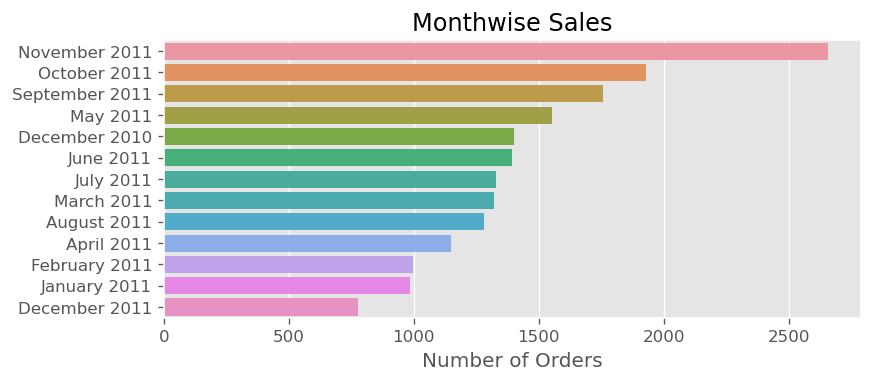

In [69]:
#Plotting a bar graph to visualize the sales in different month
plt.subplots(figsize = (7.5, 3), dpi = 120)
ax = sns.barplot(y = busiest_month['InvoiceMonth'],
           x = busiest_month['N_Orders'])
ax.set_ylabel('')
ax.set_xlabel("Number of Orders")
plt.title("Monthwise Sales")
plt.show()

In [70]:
# Set the locale to the United Kingdom
locale.setlocale(locale.LC_ALL, 'en_GB.UTF-8')

# Your number to format
total_revenue_nov = busiest_month['RevenueGenerated'].iloc[0]

# Format the number as pound sterling
total_revenue_nov = locale.currency(total_revenue_nov, grouping=True)

print(f"Highest Monthly Revenue: {busiest_month['InvoiceMonth'].iloc[0]} ({total_revenue_nov})")

print(f"Percentage of Total Revenue by {busiest_month['InvoiceMonth'].iloc[0]}: {np.round(busiest_month['RevenueGenerated'].iloc[0]*100/master_df['InvoicedPrice'].sum(),2)}%")

Highest Monthly Revenue: November 2011 (£1,156,205.61)
Percentage of Total Revenue by November 2011: 13.01%


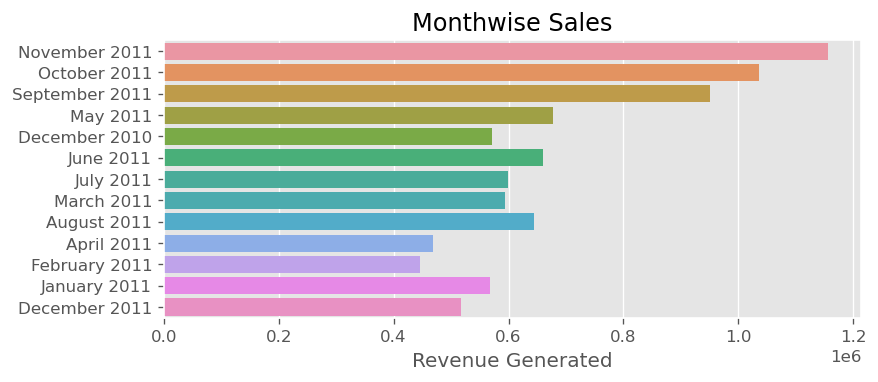

In [71]:
#Plotting a bar graph to visualize the revenue generate in different month
plt.subplots(figsize = (7.5, 3), dpi = 120)
ax = sns.barplot(x = busiest_month['RevenueGenerated'],
                 y = busiest_month['InvoiceMonth'])
ax.set_ylabel('')
ax.set_xlabel("Revenue Generated")
plt.title("Monthwise Sales")
plt.show()

#### During the busiest month i.e. **November  2011**, let's see which country contributed the most to sales. <a name = '#busiest-month'></a>

In [72]:
master_df[master_df['InvoiceDate'].dt.to_period('M') == pd.Period('2011-11', freq='M')].groupby('Country').agg({'InvoicedPrice':'sum'}).reset_index().rename({"InvoicedPrice":"Total_Revenue"}, axis=1).sort_values('Total_Revenue', ascending=False).reset_index(drop=True).head(5)

,Country,Total_Revenue
0,United Kingdom,975251.39
1,France,31274.75
2,EIRE,29448.41
3,Germany,27967.68
4,Netherlands,25874.01


- Top 5 countries that drove *HIGHEST MONTHLY REVENUE* in **November 2011**.

In [73]:
master_df[master_df['InvoiceDate'].dt.to_period('M') == pd.Period('2011-11', freq='M')].groupby('Country').agg({'InvoiceNo':'nunique'}).reset_index().rename({"InvoiceNo":"N_Orders"}, axis=1).sort_values('N_Orders', ascending=False).reset_index(drop=True).head(5)

,Country,N_Orders
0,United Kingdom,2387
1,Germany,68
2,France,62
3,EIRE,39
4,Netherlands,15


- Top 5 countries with *HIGHEST NUMBER OF MONTHLY ORDERS* in **November 2011**.

In [74]:
#checking the number of total orders made in November 2011
master_df[master_df['InvoiceDate'].dt.to_period('M') == pd.Period('2011-11', freq='M')].groupby('Country').agg({'InvoiceNo':'nunique'}).reset_index().rename({"InvoiceNo":"N_Orders"}, axis=1).sort_values('N_Orders', ascending=False)['N_Orders'].sum()

2658

In [75]:
np.round(2387*100/2658,2)

89.8

- **Number of Orders** peaked in **November 2011**.
- **November 2011** was the **BUSIEST MONTH** in the given period.
- Also, **November 2011** generated **HIGHEST MONTHLY REVENUE** for the business in the given period.

#### Why did sales shoot up in November 2011?
- In Nov 2011, almost 90% of the orders were from **United Kingdom (UK)**.
- Since November is the pre-christmas month, one of the plausible reasons could be the pre-festive shopping of the customers.
- Another reason for the sales shooting up in Nov 2011 could be any **SALE** on the website. We'll check if that's the case in the further EDA process.

### 5.5.5. Check for SALE (Nov'11) <a name='check-sale'></a>

- We'll check if there was any a SALE going on in Nov-2011.

In [76]:
master_df['StockCode'].nunique()

3665

In [77]:
master_df['UnitPrice'].nunique()

441

- We can see that there are different `UnitPrice` values for any particular `StockCode`. This is common phenomenon as the price of products keep fluctuating over time. 

In [78]:
## creating  a separate dataframe with mean UnitPrice for products sold in November 2011
nov_unitprice = master_df[(master_df['InvoiceDate'].dt.to_period("M") == pd.Period("2011-11", freq="M"))].groupby("StockCode").agg({'UnitPrice':'mean'}).reset_index().rename({'UnitPrice':'Nov_UnitPrice'}, axis = 1)

In [79]:
## creating  a separate dataframe with mean UnitPrice for products sold in the rest of the operational time
rest_unitprice = master_df[~(master_df['InvoiceDate'].dt.to_period("M") == pd.Period("2011-11", freq="M"))].groupby("StockCode").agg({'UnitPrice':'mean'}).reset_index().rename({'UnitPrice':'Rest_UnitPrice'}, axis = 1)

In [80]:
print(f"Number of Products NOT sold in Nov-2011: {master_df['StockCode'].nunique() - nov_unitprice.shape[0]}")

Number of Products NOT sold in Nov-2011: 970


In [81]:
print(f"Number of Products ONLY sold in Nov-2011: {len([item for item in nov_unitprice['StockCode'].to_list() if item not in rest_unitprice['StockCode'].to_list()])}")

Number of Products ONLY sold in Nov-2011: 19


- <a name="discuss"></a> We have to join these above DataFrame using **INNER** join because there are 970 such products that are NOT sold in **November'11** and 19 such product that are ONLY sold in **November'11**.

In [82]:
#creating a dataframe to combine the mean UnitPrice of both Nov'11 and the rest of the operation period to compare UnitPrice across products
check_sale = rest_unitprice.merge(nov_unitprice, how='inner', on='StockCode')

In [83]:
#rounding off the values to 2 decimal places
check_sale['Rest_UnitPrice'] = np.round(check_sale['Rest_UnitPrice'], 2)
check_sale['Nov_UnitPrice'] = np.round(check_sale['Nov_UnitPrice'], 2)

In [84]:
#creating a new column to quantify the price difference
check_sale['UnitPrice_diff'] = check_sale['Rest_UnitPrice'] - check_sale['Nov_UnitPrice']

In [85]:
check_sale.head()

,StockCode,Rest_UnitPrice,Nov_UnitPrice,UnitPrice_diff
0,10080,0.42,0.39,0.03
1,10120,0.21,0.21,0.00
2,10125,0.78,0.85,-0.07
3,10135,1.15,1.49,-0.34
4,11001,1.84,1.92,-0.08


In [86]:
check_sale.shape[0]

2676

In [87]:
master_df['StockCode'].nunique()

3665

In [88]:
3665 - 970 - 19

2676

**Note**: Despite having 3665 unique products sold between Dec'10 - Dec'11, we are only enable to compare the difference in mean `UnitPrice` for 2676 products because as [discussed earlier](#discuss), we have only 2676 products that are sold both in Nov'11 and the rest of the operational period.

#### As we have subtracted the mean `UnitPrice` of products for the rest of the year from the same for Nov-2011. If there was an ongoing SALE in Nov-2011, we should expect to see a drop in products' `UnitPrice` as that's what a SALE means. 
1. A negative value in `UnitPrice_diff` indicates that the mean `UnitPrice` of the particular product was higher than the same for the rest of the operational time.
2. On the contrary, a positive value in `UnitPrice_diff` indicates that the mean `UnitPrice` of the particular product was lower  than the same for the rest of the operational time.
3. If we manage to find enough instances of scenario 2, we can conclude that there was an ongoing SALE in November 2011 and one of plausible reasons for sales shooting up in November 2011 could be this.

In [89]:
check_sale['UnitPrice_diff'].describe()

count    2676.000000
mean       -0.275732
std        14.711350
min      -742.920000
25%        -0.100000
50%        -0.010000
75%         0.000000
max       151.830000
Name: UnitPrice_diff, dtype: float64

In [90]:
check_sale[(check_sale['UnitPrice_diff'] <= 0)].shape[0]*100/check_sale.shape[0]

78.43796711509717

In [91]:
check_sale[(check_sale['UnitPrice_diff'] == check_sale['UnitPrice_diff'].min())]

,StockCode,Rest_UnitPrice,Nov_UnitPrice,UnitPrice_diff
2673,DOT,558.42,1301.34,-742.92


- Almost 78.5% products didn't see a price cut in November 2011.
- Even to our surprise, the mean price of one of the products (`StockCode` = "DOT") shot up by more than 100%.

In [92]:
## Checking the range for products that were actually sold at a discounted rate
check_sale[(check_sale['UnitPrice_diff'] > 0)]['UnitPrice_diff'].describe()

count    577.000000
mean       0.730191
std        6.730752
min        0.010000
25%        0.030000
50%        0.090000
75%        0.260000
max      151.830000
Name: UnitPrice_diff, dtype: float64

In [93]:
#checking which product saw the maximum price cut
check_sale[(check_sale['UnitPrice_diff'] == check_sale['UnitPrice_diff'].max())]

,StockCode,Rest_UnitPrice,Nov_UnitPrice,UnitPrice_diff
2674,M,197.56,45.73,151.83


In [94]:
#checking the price statistics for the "M" product
master_df[(master_df['StockCode'] == "M")]['UnitPrice'].describe()

count     285.000000
mean      174.650211
std       584.542997
min         0.000000
25%         0.420000
50%         1.450000
75%        12.750000
max      4161.060000
Name: UnitPrice, dtype: float64

In [95]:
#checking the number of products saw a price cut
check_sale[(check_sale['UnitPrice_diff'] > 0)].shape[0]

577

In [96]:
#checking the number of 75% products saw a price cut
check_sale[(check_sale['UnitPrice_diff'] > 0)].shape[0]*0.75

432.75

In [97]:
#checking the percentage of products seeing a price cut in November 2011 
np.round(check_sale[(check_sale['UnitPrice_diff'] > 0)].shape[0]*100/check_sale.shape[0],2)

21.56

- 75% of the remaining 574 products saw a price cut of JUST 0.26 in November 2011.
- The maximum price-cut was of 150.88 for a product that goes by the `StockCode` "M".
- This is also not conclusive enough to consider it to be a SALE price. Because as we saw here, in 75% occasions, the product "M" was sold at less than 13.85.

**Conclusion**: There was **NO ongoing SALE during November 2011**. Hence, for more reasons for the sales shooting up in November 2011, we have to consult a domain expert.

### 5.5.6. Orders by `Days`<a name='orders-days'></a>

In [98]:
master_df['InvoiceDate'].dt.day_name().unique()

array(['Wednesday', 'Thursday', 'Friday', 'Sunday', 'Monday', 'Tuesday'],
      dtype=object)

- Looks like the business never received an order on **Saturday**.

## Q4. Which is the busiest day of the week?

In [99]:
#creating a DataFrame to store daywise sales and total revenue
busiest_day = master_df.groupby(master_df['InvoiceDate'].dt.day_name()).agg({'InvoiceNo':'nunique', 'InvoicedPrice':'sum'}).rename({'InvoiceNo':'N_Orders', "InvoicedPrice":'Total_Revenue'}, axis=1)

In [100]:
busiest_day.sort_values(['Total_Revenue'], ascending = False)

,N_Orders,Total_Revenue
InvoiceDate,,
Thursday,4033,1973015.730
Tuesday,3185,1697733.801
Wednesday,3455,1584283.830
Friday,2831,1483080.811
Monday,2863,1363604.401
Sunday,2169,785490.321


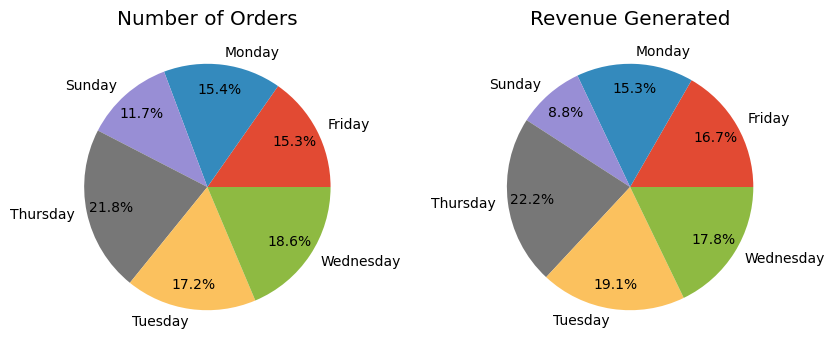

In [101]:
# Create the pie chart
fig, ax = plt.subplots(ncols = 2, nrows = 1, figsize = (10,4), dpi = 100)
ax[0].pie(busiest_day['N_Orders'],
                                 labels = busiest_day.index,
                                 autopct = lambda pct: f'{pct:.1f}%',
                                 pctdistance = 0.8)
ax[0].set_title("Number of Orders")

ax[1].pie(busiest_day['Total_Revenue'],
                                 labels = busiest_day.index,
                                 autopct = lambda pct: f'{pct:.1f}%',
                                 pctdistance = 0.8)
ax[1].set_title("Revenue Generated")

# Show the pie chart
plt.show()

- The data is **ALMOST** evenly distributed across all the different days of the week.
- Although **Thursday** is the BUSIEST day of the week both in terms of most sales and most revenue generation, it doesn't have a significantly large impact on the overall business.

### 5.5.7. Rush Hour <a name='rush-hour'></a>

In [102]:
#creating a dataframe that shows number of orders and total revenue generated by hours
rush_hour = master_df.groupby(master_df['InvoiceDate'].dt.hour).agg({'InvoiceNo':'nunique', 'InvoicedPrice':'sum'}).reset_index().rename({"InvoiceDate":"InvoiceHour", 'InvoiceNo':'N_Orders', "InvoicedPrice":'Total_Revenue'}, axis=1)

In [103]:
#chaning dtype of InvoiceHour to object to avoid confusion during visualization
rush_hour['InvoiceHour'] = rush_hour['InvoiceHour'].astype('object')

In [104]:
rush_hour.head()

,InvoiceHour,N_Orders,Total_Revenue
0,6,1,4.250
1,7,29,31059.210
2,8,555,281997.790
3,9,1394,842392.341
4,10,2226,1259267.591


In [105]:
rush_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   InvoiceHour    15 non-null     object 
 1   N_Orders       15 non-null     int64  
 2   Total_Revenue  15 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 492.0+ bytes


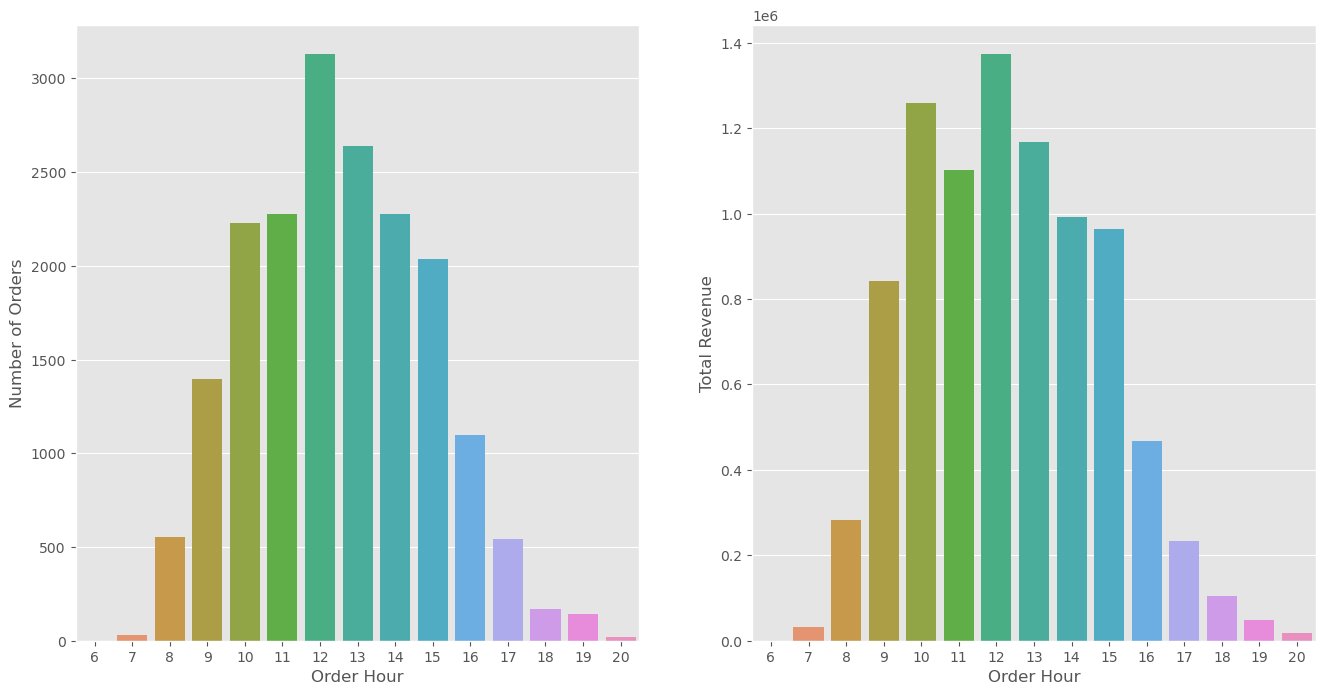

In [106]:
#creating two barplots: one for Number of Orders received and another for Total Revenue Generated
fig, axs = plt.subplots(ncols = 2, nrows = 1, figsize = (16,8))
g = sns.barplot(x = rush_hour['InvoiceHour'],
                y = rush_hour['N_Orders'],
                ax = axs[0])
g.set_ylabel("Number of Orders")
g.set_xlabel("Order Hour")

h = sns.barplot(x = rush_hour['InvoiceHour'],
                y = rush_hour['Total_Revenue'],
                ax = axs[1])
h.set_ylabel("Total Revenue")
h.set_xlabel("Order Hour")

plt.show()

- Apparently, for the business the **RUSH HOUR** is from **12:00 PM to 02:00 PM**.
- With this information, company's website can be better optimized for that specific time-period.
- Also, we can make sure that the company avoids routine maintenance during the **Rush Hour**.
- That way customer-bounce-rate can be minimized.

## 5.6. Analyzing `Country` <a name='country-analysis'></a>

In [107]:
master_df['Country'].nunique()

37

In [108]:
# creating a dataframe containing country wise sales and sales revenue for further analysis
country_wise = master_df.groupby('Country').agg({"InvoiceNo":"nunique", "InvoicedPrice":'sum'}).sort_values(by='InvoicedPrice', ascending = False).reset_index().rename({"InvoiceNo":"N_Orders", "InvoicedPrice":'Total_Revenue'}, axis = 1)

In [109]:
country_wise.head()

,Country,N_Orders,Total_Revenue
0,United Kingdom,16649,7285024.644
1,Netherlands,95,285446.340
2,EIRE,260,265262.460
3,Germany,457,228678.400
4,France,389,208934.310


In [110]:
country_wise['%_N_Orders'] = np.round(country_wise['N_Orders']*100/country_wise['N_Orders'].sum(),2)

In [111]:
country_wise['%_Total_Revenue'] = np.round(country_wise['Total_Revenue']*100/country_wise['Total_Revenue'].sum(),2)

### 5.6.1. Top 5 Countries <a name='top-five'></a>

In [112]:
country_wise.sort_values(['Total_Revenue'], ascending = False).head()

,Country,N_Orders,Total_Revenue,%_N_Orders,%_Total_Revenue
0,United Kingdom,16649,7285024.644,89.82,81.97
1,Netherlands,95,285446.340,0.51,3.21
2,EIRE,260,265262.460,1.40,2.98
3,Germany,457,228678.400,2.47,2.57
4,France,389,208934.310,2.10,2.35


In [113]:
country_wise.sort_values(['N_Orders'], ascending = False).head()

,Country,N_Orders,Total_Revenue,%_N_Orders,%_Total_Revenue
0,United Kingdom,16649,7285024.644,89.82,81.97
3,Germany,457,228678.400,2.47,2.57
4,France,389,208934.310,2.10,2.35
2,EIRE,260,265262.460,1.40,2.98
8,Belgium,98,41196.340,0.53,0.46


- The Online Retail Stores serves in 37 countries.
- The business is mostly present in **United Kingdom (UK)**.
- **United Kingdom (UK)** drove almost 90% of sales and 82% of sales revenue.
- Most selling product in Top 5 Countries are discussed [here](#country-wise).

## 5.7. Analyzing `CustomerID` <a name='customer-analysis'></a>

In [114]:
master_df['CustomerID'].nunique()

4339

### 5.7.1. Top 5 Most Valuable Customers <a name='top-five-cust'></a>

In [115]:
master_df.groupby('CustomerID').agg({'InvoicedPrice':'sum'}).sort_values('InvoicedPrice', ascending = False).reset_index().rename({"InvoicedPrice":"Total_Revenue"}, axis = 1).head()

,CustomerID,Total_Revenue
0,14646.0,280206.02
1,18102.0,259657.30
2,17450.0,194390.79
3,16446.0,168472.50
4,14911.0,143711.17


### 5.7.2. Average Spent <a name='avg-spent'></a>

In [116]:
master_df.groupby("InvoiceNo").agg({'InvoicedPrice':'sum'}).reset_index().rename({'InvoicedPrice':'TotalSpent'}, axis=1)['TotalSpent'].describe()

count     18536.000000
mean        479.456673
std        1677.916285
min           0.000000
25%         157.200000
50%         302.565000
75%         469.467500
max      168469.600000
Name: TotalSpent, dtype: float64

In [117]:
master_df.groupby("InvoiceNo").agg({'InvoicedPrice':'sum'}).reset_index().rename({'InvoicedPrice':'TotalSpent'}, axis=1)['TotalSpent'].skew()

62.15879078130721

- The distribution is highly right-skewed.
- 75% customers spent less than £470.
- Highest Customer Spent: £168,469
- Hence, it's better to consider the median for the central value.
- It's safe to conclude most th

## 6. Cohort Analysis on Customer Retention <a name='cohort'></a>

In [118]:
master_df['CustomerID'].nunique()

4339

- The business managed to acquire 4338 unique customers over a span of 13 months.
- Now, we have to consider customer retention on a monthly basis.
- Hence, we'll create a Retention Matrix for our Cohort Analysis on Customer Retention.

### 6.1. Retention Matrix <a name='retention'></a>

In [119]:
#creating a new column by extracting only the invoice month from the InvoiceDate 
master_df['InvoiceMonth'] = master_df['InvoiceDate'].dt.to_period("M")

In [120]:
#creating a new column for indentifying the month a customer was first acquired in
master_df['CohortMonth'] = master_df.groupby('CustomerID')['InvoiceMonth'].transform('min')

In [121]:
#creating an index based on the months a customer was active on the platform
master_df['CohortIndex'] = (master_df['InvoiceMonth'] - master_df['CohortMonth']).apply(attrgetter('n'))

master_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoicedPrice,InvoiceMonth,CohortMonth,CohortIndex
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.3,2010-12,2010-12,0
1,536373,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 09:02:00,2.55,17850.0,United Kingdom,15.3,2010-12,2010-12,0
2,536375,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 09:32:00,2.55,17850.0,United Kingdom,15.3,2010-12,2010-12,0
3,536390,85123A,WHITE HANGING HEART T-LIGHT HOLDER,64,2010-12-01 10:19:00,2.55,17511.0,United Kingdom,163.2,2010-12,2010-12,0
4,536394,85123A,WHITE HANGING HEART T-LIGHT HOLDER,32,2010-12-01 10:39:00,2.55,13408.0,United Kingdom,81.6,2010-12,2010-12,0


In [122]:
#creating a new DataFrame segregating customers based on the month they were acquired and the number of months they were active
cohort_data = master_df.groupby(['CohortMonth','CohortIndex'])['CustomerID'].nunique().reset_index().rename({'CustomerID':'N_Customers'}, axis = 1)

cohort_data.head()

,CohortMonth,CohortIndex,N_Customers
0,2010-12,0,885
1,2010-12,1,324
2,2010-12,2,286
3,2010-12,3,340
4,2010-12,4,321


In [123]:
#pivoting the data to prepare a retention matrix having CohortIndex as columns
cohort_table = cohort_data.pivot_table(columns = "CohortIndex", index="CohortMonth", values = "N_Customers")

cohort_table

CohortIndex,0,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,,
2010-12,885.0,324.0,286.0,340.0,321.0,352.0,321.0,309.0,313.0,350.0,331.0,445.0,235.0
2011-01,417.0,92.0,111.0,96.0,134.0,120.0,103.0,101.0,125.0,136.0,152.0,49.0,NaN
2011-02,380.0,71.0,71.0,108.0,103.0,94.0,96.0,106.0,94.0,116.0,26.0,NaN,NaN
2011-03,452.0,68.0,114.0,90.0,101.0,76.0,121.0,104.0,126.0,39.0,NaN,NaN,NaN
2011-04,300.0,64.0,61.0,63.0,59.0,68.0,65.0,78.0,22.0,NaN,NaN,NaN,NaN
2011-05,284.0,54.0,49.0,49.0,59.0,66.0,75.0,27.0,NaN,NaN,NaN,NaN,NaN
2011-06,242.0,42.0,38.0,64.0,56.0,81.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,188.0,34.0,39.0,42.0,51.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,169.0,35.0,42.0,41.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [124]:
cohort_size = cohort_table.iloc[:, 0]

In [125]:
retention_matrix = cohort_table.divide(cohort_size, axis=0)

retention_matrix

CohortIndex,0,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,,
2010-12,1.0,0.366102,0.323164,0.384181,0.362712,0.397740,0.362712,0.349153,0.353672,0.395480,0.374011,0.502825,0.265537
2011-01,1.0,0.220624,0.266187,0.230216,0.321343,0.287770,0.247002,0.242206,0.299760,0.326139,0.364508,0.117506,NaN
2011-02,1.0,0.186842,0.186842,0.284211,0.271053,0.247368,0.252632,0.278947,0.247368,0.305263,0.068421,NaN,NaN
2011-03,1.0,0.150442,0.252212,0.199115,0.223451,0.168142,0.267699,0.230088,0.278761,0.086283,NaN,NaN,NaN
2011-04,1.0,0.213333,0.203333,0.210000,0.196667,0.226667,0.216667,0.260000,0.073333,NaN,NaN,NaN,NaN
2011-05,1.0,0.190141,0.172535,0.172535,0.207746,0.232394,0.264085,0.095070,NaN,NaN,NaN,NaN,NaN
2011-06,1.0,0.173554,0.157025,0.264463,0.231405,0.334711,0.095041,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,1.0,0.180851,0.207447,0.223404,0.271277,0.111702,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,1.0,0.207101,0.248521,0.242604,0.124260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [126]:
cohort_size.index = cohort_size.index.strftime('%B %Y')

### 6.2. Cohort Analysis Heatmap <a name="heatmap"></a>

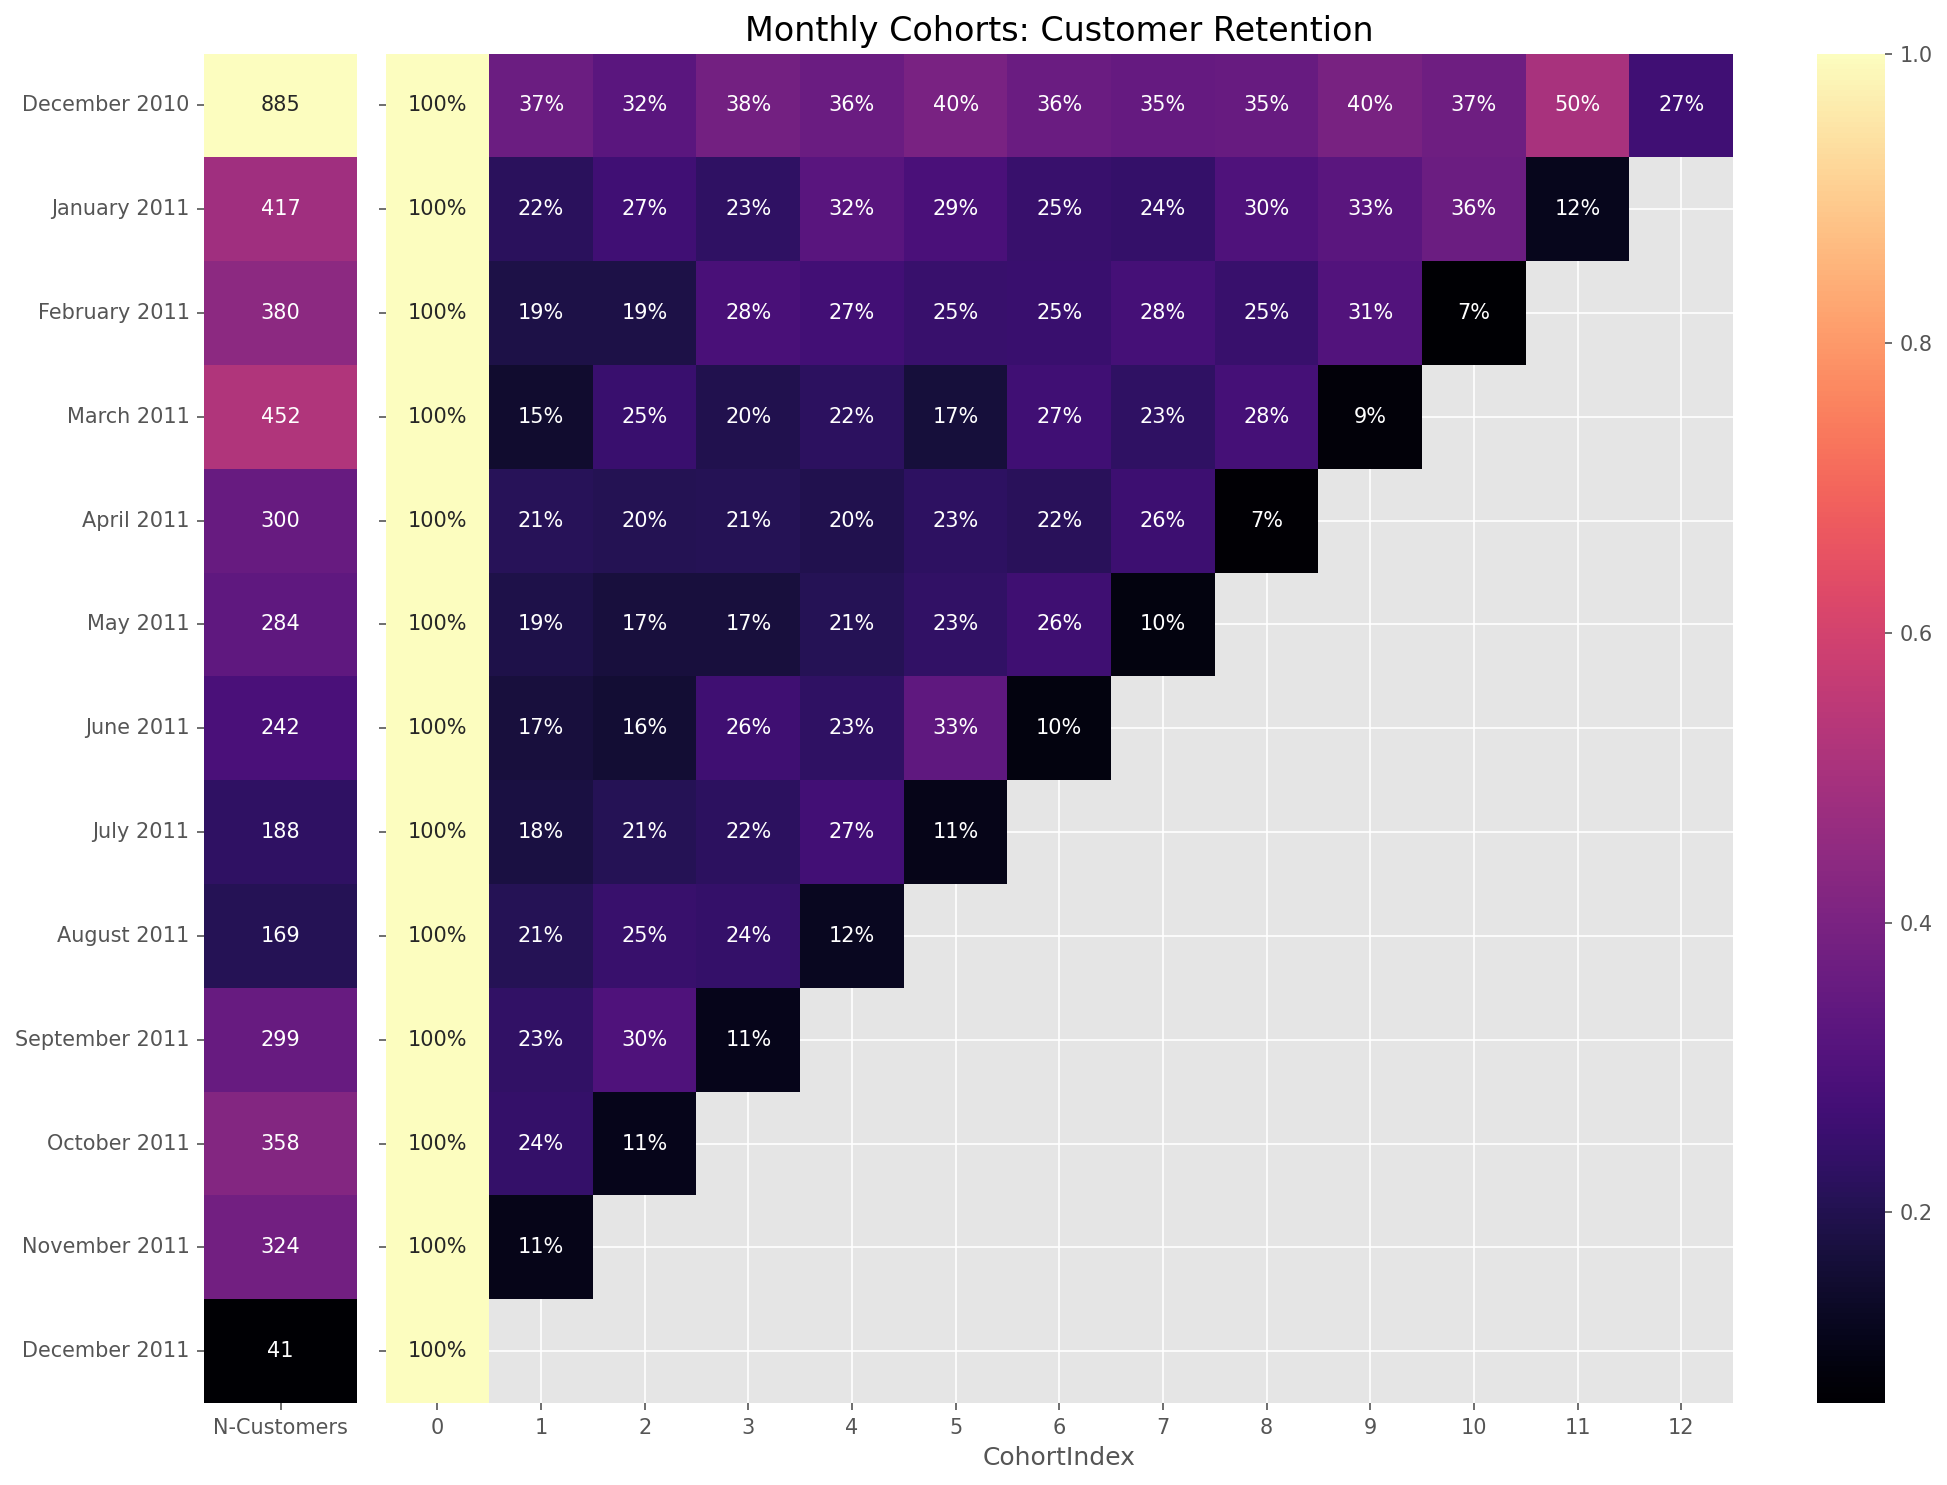

In [127]:
fig, ax = plt.subplots(1, 2, figsize=(14, 10), sharey=True, gridspec_kw={'width_ratios': [1, 11]}, dpi = 150)

# retention matrix
sns.heatmap(retention_matrix, 
            mask = retention_matrix.isnull(), 
            annot = True, 
            fmt = '.0%', 
            cmap = sns.color_palette("magma", as_cmap=True), 
            ax = ax[1])
ax[1].set_title('Monthly Cohorts: Customer Retention', fontsize=16)
ax[1].set(ylabel = '')

# cohort size
cohort_size_df = pd.DataFrame(cohort_size).rename(columns = {0: 'N-Customers'})
sns.heatmap(cohort_size_df, 
            annot = True, 
            cbar = False, 
            fmt = 'g',
            ax = ax[0],
            cmap = sns.color_palette("magma", as_cmap=True))
ax[0].set(ylabel = '')

fig.tight_layout()

# Summary and Recommendation <a name='summary'></a>

## 7. Summary 
### 7.1. Data Overview
- Total number of entries: 541909
- Number of columns: 8

### 7.2. Data Cleaning
- Almost 25% entries had NULL values.
- Almost 1.28% entries were duplicated.
- Dropped rows containing both NULL values and duplicated entries.

### 7.3. Product Analysis
- The platform sold 3665 unique items.
- Most Selling Product: PAPER CRAFT , LITTLE BIRDIE (StockCode: 23843)
- Most Revenue Generating Product: PAPER CRAFT , LITTLE BIRDIE (StockCode: 23843)

### 7.4. Sales & Revenue
- Total Revenue Generated: £8,887,208.89 (≈ £8.9M)
- Total Orders: 18532
- Highest Monthly Sales: November 2011 (£1.15M) (13% of Total Reveneue)
- Highest Month Orders: November 2011 (2657) (14.34% of Total Orders)
- Average Customer Spent: £480.
- Highest Customer Spent: £168,470.
- Half of the customers spent less than £302.
- Highest Quantity Sold: 80995
- Average Quantity per Order: 33.
- Half of the customers ordered items in less than 7 quantities.

### 7.5. Time-based Patterns
- Sales shot up in November 2011 despite the absence of any ongoing SALE during that period.
- Thursdays received almost 22% orders.
- Also, Thursdays drove almost 22.2% revenue.
- 12:00PM to 02:00PM is identified as RUSH HOUR.

### 7.6. Geographical Insights
- Highest Number of Orders came from United Kingdom (UK).
- The platform serves in 37 countries.
- UK also drove the Highest Revenue for the business.
- Although almost 90% orders came from UK, 8.36% revenue was driven by Germanym, France, EIRE and Belgium collectively.
- Most Selling Product in UK: PAPER CRAFT , LITTLE BIRDIE (StockCode: 23843)

### 7.7. Customer Analysis
- Served Customers: 4338
- The business has fairly poor Customer Retention rate.
- December 2010 did fairly well in terms of both Customer acquisition & Customer retention.

## 8. Recommendations
### 8.1. Data Management and Cleaning
- Regularly perform data cleaning to address NULL values and duplicate entries.
- Implement data validation checks during data entry to reduce errors.

### 8.2. Sales and Revenue Optimization
- Consider implementing targeted promotions or discounts to boost sales during slower months.
- Analyze high-spending customers and tailor marketing strategies to retain and attract similar customers.

### 8.3. Customer Engagement and Retention
- Develop a customer loyalty program to improve retention rates.
- Implement personalized marketing campaigns based on customer preferences and behavior.

### 8.4.Time-based Marketing
- Leverage the observed rush hour (12:00PM to 02:00PM) for targeted marketing or flash sales.
- Optimize marketing efforts on Thursdays, the day with the highest order and revenue percentages.

### 8.5. Demographic Expansion
- Explore opportunities for expansion in countries beyond the UK.
- Customize marketing strategies for different regions based on product popularity and cultural preferences.

### 8.6. Seasonal Planning
- Plan inventory and marketing strategies in anticipation of peak seasons, such as November. (As the business saw high bulk orders in different occasions)
- Explore partnerships or collaborations during peak seasons to maximize sales potential.

### 8.7. Customer Retention
- Focus on strategies to improve customer retention, especially during peak shopping seasons.
- Consider implementing a customer feedback system to address concerns and enhance the overall customer experience.

**Lastly,**
- Invest in training for employees to provide excellent customer service, especially during peak hours.